# 1. Lý thuyết

1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

**=> Đáp án C**

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.

**=> Đáp án D**

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

**=> Đáp án D**

4) Sự khác biệt giữa RNN và CNN là gì?

A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

**=> Đáp án A**

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep

**=> Đáp án B**



# 2. Thực hành


6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)

7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)

8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

## 6. Train model phân loại cảm xúc văn bản

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive 

In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

In [ ]:
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

In [ ]:
!unzip /content/drive/MyDrive/sentiment-analysis-on-movie-reviews.zip

In [ ]:
!unzip /content/drive/MyDrive/test.tsv.zip
!unzip /content/drive/MyDrive/train.tsv.zip

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/train.tsv', delimiter = '\t')
test_data = pd.read_csv('/content/drive/MyDrive/test.tsv', sep = '\t')
train_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

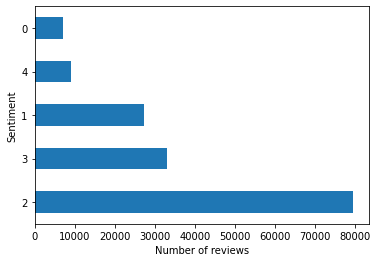

In [ ]:
import matplotlib.pyplot as plt
train_data['Sentiment'].value_counts().plot(kind='barh')
plt.ylabel('Sentiment')
plt.xlabel('Number of reviews')
train_data['Sentiment'].value_counts()

In [ ]:
train_data = train_data.drop(['PhraseId','SentenceId'],axis = 1)
test_data = test_data.drop(['PhraseId','SentenceId'],axis = 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import Bidirectional

In [ ]:
train_data.head(8)

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
5,of escapades demonstrating the adage that what...,2
6,of,2
7,escapades demonstrating the adage that what is...,2


In [ ]:
# Data Preprocessing
from nltk.corpus import stopwords
import re

def text_cleaning(text):
    # https://www.w3schools.com/python/python_regex.asp ( regular expression )
    forbidden_words = set(stopwords.words('english'))
    if text:
        # Loai bo dau cau
        text = ' '.join(text.split('.'))
        # Loai bo ki tu dac biet /, \
        text = re.sub('\/',' ',text)
        text = re.sub(r'\\',' ',text)
        # Loai bo duong link
        text = re.sub(r'((http)\S+)','',text)
        # Loai bo so
        text = re.sub('[^A-Za-z]', ' ', text.strip().lower())
        # Loai bo khoang trong
        text = re.sub(r'\s+', ' ', text).strip()
        # Loai bo cac ki tu ko phai la tu
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        # Loai bo stop word (nhung tu thong dung ko mang y nghia phan loai van ban)
        text = [word for word in text.split() if word not in forbidden_words]
        return text
    return []

In [ ]:
max_features = 50000  # Only consider the top 50k words
maxlen = 200

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Build the dictionary including 50000 words and each one is encoded to one-hot vector
from keras.preprocessing.text import one_hot

total_docs = pd.concat([train_data,test_data],axis = 0,ignore_index = True)
total_docs['Phrase'] = total_docs['Phrase'].apply(lambda x: ' '.join(text_cleaning(x)))
phrases = total_docs['Phrase'].tolist()
vocab_size = 50000
encoded_phrases = [one_hot(d,vocab_size) for d in phrases] 
total_docs['Phrase'] = encoded_phrases
total_docs['Len'] = [len(d) for d in encoded_phrases]
# Loai bo cac van ban rong
total_docs = total_docs[total_docs['Len'] > 0]
train_data = total_docs[:len(train_data)]
test_data = total_docs[len(train_data):]
x_train = train_data['Phrase']
y_train = train_data['Sentiment']
x_val = test_data['Phrase']
y_val = test_data['Sentiment']

In [ ]:
# Padding ve cung mot do dai 200
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [ ]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
# Train model 
model = Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(50000, 128)) # xay dung tu dien chua 50000 tu ma moi tu la 1 128-dimensional vector
# Add 2 bidirectional LSTMs
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
# Add a classifier
model.add(Dense(5, activation="softmax"))
#model = keras.Model(inputs, outputs)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6400000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 6,598,277
Trainable params: 6,598,277
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
4877/4877 [==============================] - 1048s 212ms/step - loss: nan - accuracy: 0.0454 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/3
4877/4877 [==============================] - 1033s 212ms/step - loss: nan - accuracy: 0.0453 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/3
4877/4877 [==============================] - 1032s 212ms/step - loss: nan - accuracy: 0.0453 - val_loss: nan - val_accuracy: 0.0000e+00


## 7. Train LSTM model dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AirPassengers.csv', index_col=0)
data

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [ ]:
X = data['#Passengers'].values
print(X.shape)

(144,)


In [ ]:
from datetime import datetime

data.index = list(
      map(
          lambda x: datetime.strptime(x, '%Y-%m'), 
          list(data.index)
          )
    )

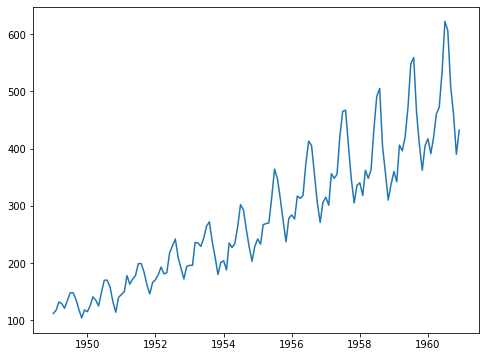

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(data, label = 'Airline Passangers Data')
plt.show()

In [ ]:
# DataLoader
def sliding_windows(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)] # seq_length-1
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

# Scaling dataset
sc = MinMaxScaler()
data = sc.fit_transform(X.reshape(-1, 1))

# Create sliding windows = 4
seq_length = 3
x, y = sliding_windows(data, seq_length)

# Train/test split
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

# Convert into variable
dataX = torch.Tensor(np.array(x))
dataY = torch.Tensor(np.array(y))

trainX = torch.Tensor(np.array(x[0:train_size]))
trainY = torch.Tensor(np.array(y[0:train_size]))

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))